<a href="https://colab.research.google.com/github/eliot28/analisis_texto/blob/master/General_web_clave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import string
import warnings
import sys
from google.colab import files


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
uploaded = files.upload()

Saving Generales_ClaveWeb.xlsx to Generales_ClaveWeb (1).xlsx


In [3]:
df = pd.read_excel('Generales_ClaveWeb.xlsx',sheet_name='Exportar Hoja de Trabajo')
df.head(5)

,SS_NRO,TIPO_CANAL,SUB_CANAL,TIPO,NIVEL_1,NIVEL_2,NIVEL_3,ESTADO,SUBESTADO,TIENDA_ORIGEN,FECHA_CREACION,Dias_abierto,Abierto + 30 dias,FECHA_COMPROMISO,FECHA_ASIGNACION,FECHA_SOLUCION,FECHA_CIERRE,FECHA_SEGUIMIENTO,DESCRIPCION,SOLUCION,DIAS_ABIERTO,MES_DE_LA_SS,ID_CREADOR,PUESTO_TRABAJO_CREADOR,SUCURSAL_CREADOR,NOMBRE_CREADOR,ID_PROPIETARIO,PUESTO_TRABAJO_PROPIETARIO,SUCURSAL_PROPIETARIO,NOMBRE_PROPIETARIO,ID_RESOLUTOR,PUESTO_TRABAJO_RESOLUTOR,SUCURSAL_RESOLUTOR,NOMBRE_RESOLUTOR,ID_FINALIZADOR,PUESTO_TRABAJO_FINALIZADOR,SUCURSAL_FINALIZADOR,NOMBRE_FINALIZADOR,RUT,DIG_VERIFICADOR,CLIENTE_F,NOMBRE_CLIENTE,APELLIDO_PATERNO_CONTACTO,APELLIDO_MATERNO_CONTACTO,METODO_COMUNIC_PREFER_CONTACTO,FONO_CONTACTO,CELULAR_CONTACTO,EMAIL_CONTACTO,NUM_F12,ESTADO_F12,DIAS_ATRASO_COMPROMISO,LOCAL_DESPACHO,SKU,FLAG_FCR,MOTIVO_PROBLEMA,NUMERO_ORDEN_COMPRA,NRO_F21,NRO_F22,SOLICITUD_ASOCIADA,TIPO_CIERRE,CLASE,DESC_CLASE,SUBCLASE,DESC_SUBCLASE,EVENTOS_ESPECIALES,SUB_TIPO_CIERRE,MARCA,AGENDAMIENTO,TIPO_INSTALACION,ORDEN_DE_SERVICIO,NOMBRE_TITULAR,RUT_TITULAR,BANCO,TIPO_CUENTA,NRO_CUENTA,MONTO_COMPRA
0,1-83116519309,BackOffice,NaN,Pedido,Experiencia de compra,Experiencia Web,Problema con Usuario web/Clave,Abierto,En proceso,NaN,11-05-2020 12:50:40,55.464815,Y,12-05-2020 21:00:00,19-06-2020 05:00:16,NaN,NaN,NaN,problemas al ingresar por su usuario. no le pe...,2DO CORREO ENVIADO A CLIENTA PARA QUE NOS INFO...,"55,86",MAYO 2020,268702385,Ejecutivo BackOffice Chile 5,Back Office,ALEXANDER YOEL QUERO AULAR,235045117,Ejecutivo BackOffice Chile 5,Back Office,JACQUELINE GUISELLA MORENO RODRIGUEZ,NaN,NaN,NaN,,NaN,NaN,NaN,,19048377,0,Normal,LIGIA,PEREDA ORMEÑO,,Email,979450975,NaN,l.pereda.o@gmail.com,NaN,NaN,"54,52",NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-56870015993,Call Center,NaN,Pedido,Experiencia de compra,Experiencia Web,Problema con Usuario web/Clave,Abierto,En proceso,Fono-Compras,07-12-2018 12:52:52,576.463287,Y,13-12-2018 21:00:00,05-11-2019 20:01:14,NaN,NaN,NaN,solicitud de grabacionfecha de la llamada29-11...,Se solicita grabacion en ACT 1-QZB4WJQ client...,"576,9",DICIEMBRE 2018,70439370,Empleado Desactivado,Holding Falabella,LUZMILA IRIS RONDON SALAZAR,153407096,Ejecutivo Call Center,Call Center IN,NELSON FELIPE AGUAYO MOLINA,NaN,NaN,NaN,,NaN,NaN,NaN,,15760640,9,Cliente F,PAMELA,GARCIA,ARANCIBIA,Email,954134801,NaN,pamegarcia77@hotmail.com,1.440244e+11,NaN,"570,56",NaN,6600201.0,N,NaN,5.209761e+09,NaN,NaN,NaN,NaN,J110501,PREPAGOS / LIBRES,J11050101,PRE PAGOS,NaN,NaN,MOVISTAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-84096004076,BackOffice,NaN,Pedido,Experiencia de compra,Experiencia Web,Problema con Usuario web/Clave,Abierto,Asignado,NaN,28-05-2020 10:18:25,38.570544,Y,29-05-2020 21:00:00,28-05-2020 10:21:00,NaN,NaN,NaN,cliente no tiene acceso a su portal le indica ...,REITERA LLAMADA Y SOLICITA CON SUMA URGENCIACL...,"38,97",MAYO 2020,193420508,Ejecutivo Back Office,Back Office,RICARDO IGNACIO RIVAS TURRA,257834093,Ejecutivo BackOffice Sernac 2,Back Office,JONATHAN RAFAEL ARAUJO MACERO,NaN,NaN,NaN,,NaN,NaN,NaN,,13202613,0,Normal,MARIA CATALINA,CERDA,RUSCICA,Email,973368112,NaN,CATA_CERDA@YAHOO.COM,NaN,NaN,"37,52",NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1-84125163475,BackOffice,NaN,Pedido,Experiencia de compra,Experiencia Web,Problema con Usuario web/Clave,Abierto,Asignado,NaN,28-05-2020 15:30:59,38.353484,Y,29-05-2020 21:00:00,28-05-2020 15:32:29,NaN,NaN,NaN,cliente indica que lleva una semana tratando d...,contactar al correo fernando_roa3791@hotmail.c...,"38,75",MAYO 2020,256673940,Ejecutivo BackOffice Chile 5,Back Office,DAYAIRÍ PEÑA FERNANDEZ,258128516,Ejecutivo Back Office,Back Office,JAVIER ANTONIO RIVERO OLIVEROS,NaN,NaN,NaN,,NaN,NaN,NaN,,12776629,0,Normal,FERNANDO,ROA,FIGUEROA,Email,2221052,NaN,fernando_roa3791@hotmail.com,NaN,NaN,"37,52",NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
apertura_canal = df[['SS_NRO','TIPO_CANAL']].groupby('TIPO_CANAL').count().reset_index().sort_values('SS_NRO', ascending=False)
apertura_canal['pctje'] = ((apertura_canal['SS_NRO']/apertura_canal['SS_NRO'].sum())*100).round(1)
apertura_canal

,TIPO_CANAL,SS_NRO,pctje
1,BackOffice,464,45.6
2,Call Center,335,32.9
0,Asistente Virtual,198,19.4
3,Interno,17,1.7
4,Redes Sociales,2,0.2
5,Servicio al Consumidor,1,0.1
6,Sucursal,1,0.1


In [5]:
apertura_M30 = df[['SS_NRO','Abierto + 30 dias']].groupby('Abierto + 30 dias').count().reset_index().sort_values('SS_NRO',ascending=False)
apertura_M30['pctje'] = ((apertura_M30['SS_NRO']/apertura_M30['SS_NRO'].sum())*100).round(1)
apertura_M30

,Abierto + 30 dias,SS_NRO,pctje
0,N,760,74.7
1,Y,258,25.3


In [6]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [7]:
import re

def remove_pattern(input_txt, pattern, replace):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, replace, input_txt)
        
    return input_txt

In [8]:

df['texto_limpio']=df['DESCRIPCION'].apply(lambda x: x.lower())
df['texto_limpio']=np.vectorize(remove_pattern)(df['texto_limpio'], "@[\w]*", '')
df['texto_limpio']=np.vectorize(remove_pattern)(df['texto_limpio'],'https?://[A-Za-z0-9./]+', '')
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace(',', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('.', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('-', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace(':', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('á', 'a'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('é', 'e'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('í', 'i'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('ó', 'o'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('ú', 'u'))

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('spanish'))

stop_words = set(nltk.corpus.stopwords.words('spanish'))
exclude_words = set(('todos','todo','otros','estuve','estado','he','ha','aun','haber','tenia','tuviese','tuviera','tenido','tuviesen', 'muchos','nada','sean', 'son'))
new_stop_words = stop_words.difference(exclude_words)

def eliminar_stopwords(stopwords):
    stopwords = ' '.join(word for word in stopwords.split() if word not in stop_words)
    return stopwords

df.loc[:,'texto_limpio'] = df['texto_limpio'].apply(lambda x: eliminar_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', '

In [10]:
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace(' cl ', ' cliente '))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cta ', 'cuenta '))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cte ', 'cliente '))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cl ', 'cliente '))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('pagweb', 'pagina web'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cliente indica', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cliente solicita', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('creada actividad comunicacion', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cliente consulta', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cliente informa', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('cliente menciona', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('falabellacom', 'falabella'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('?',''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('//', ''))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('fcom', 'falabella'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('reseo', 'reseteo'))
df['texto_limpio']=df['texto_limpio'].apply(lambda x: x. replace('   ', '  '))

In [11]:
df['texto_limpio'].head(10)

0    problemas ingresar usuario permite ingresar pa...
1    solicitud grabacionfecha llamada29112018hora a...
2    cliente acceso portal indica llegarà codigo co...
3     lleva semana tratando ingresa usuario indica ...
4     envia clave provisoria intentado varias veces...
5      cliente presenta fallas acceder paina wed clave
6                         registrado app falabella rut
7     lelga correo cmabio contraseña correo resetea...
8     nombre cuenta asociado titular titular rut ll...
9     puede ingresar pagina web solicita revision c...
Name: texto_limpio, dtype: object

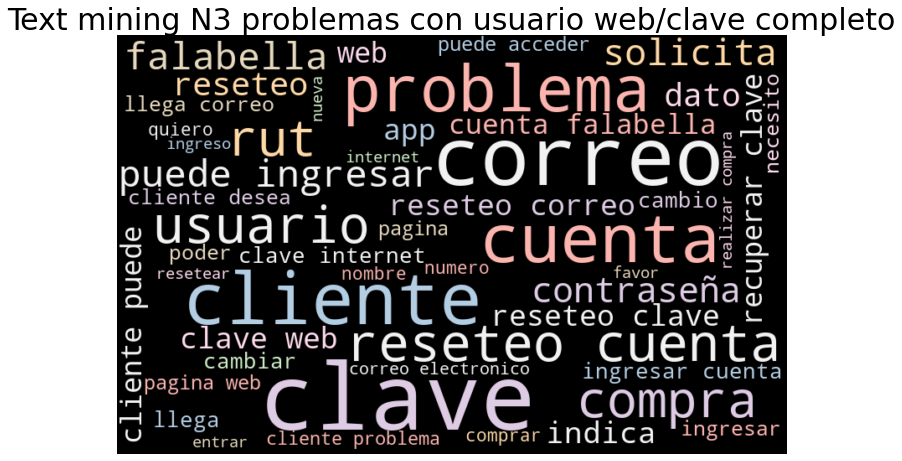

In [12]:
from wordcloud import WordCloud
palabras = ' '.join([text for text in df['texto_limpio']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='black',colormap=plt.cm.Pastel1, max_words=50).generate(palabras)

plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Text mining N3 problemas con usuario web/clave completo', fontsize = 30)
plt.show()

In [13]:
wordcounts = df['texto_limpio'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
wordcounts_descripcion = pd.DataFrame(wordcounts, columns=['cantidad'])
wordcounts_descripcion = wordcounts_descripcion.reset_index()
wordcounts_descripcion.rename(columns={'index': 'palabra'}, inplace=True)
wordcounts_descripcion.sort_values('cantidad', ascending=False, inplace=True)
wordcounts_descripcion.head(20)

,palabra,cantidad
73,clave,393.0
67,,338.0
37,correo,276.0
10,cliente,266.0
4,cuenta,255.0
70,reseteo,228.0
49,puede,170.0
0,ingresar,169.0
103,web,113.0
6,falabella,108.0


In [14]:
from collections import Counter
from itertools import chain

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

df['bigrams'] = df['texto_limpio'].map(lambda x: find_ngrams(x.split(" "), 2))
df['trigrams'] = df['texto_limpio'].map(lambda x: find_ngrams(x.split(" "), 3))
df[['texto_limpio','bigrams','trigrams']].head()

,texto_limpio,bigrams,trigrams
0,problemas ingresar usuario permite ingresar pa...,"[(problemas, ingresar), (ingresar, usuario), (...","[(problemas, ingresar, usuario), (ingresar, us..."
1,solicitud grabacionfecha llamada29112018hora a...,"[(solicitud, grabacionfecha), (grabacionfecha,...","[(solicitud, grabacionfecha, llamada29112018ho..."
2,cliente acceso portal indica llegarà codigo co...,"[(cliente, acceso), (acceso, portal), (portal,...","[(cliente, acceso, portal), (acceso, portal, i..."
3,lleva semana tratando ingresa usuario indica ...,"[(, lleva), (lleva, semana), (semana, tratando...","[(, lleva, semana), (lleva, semana, tratando),..."
4,envia clave provisoria intentado varias veces...,"[(, envia), (envia, clave), (clave, provisoria...","[(, envia, clave), (envia, clave, provisoria),..."


In [15]:
bigrams = df['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigram_counts = Counter(bigrams)
bigram_counts.most_common(20)

[(('reseteo', 'cuenta'), 83),
 (('puede', 'ingresar'), 72),
 (('', 'reseteo'), 53),
 (('', 'puede'), 48),
 (('reseteo', 'correo'), 44),
 (('clave', 'web'), 44),
 (('reseteo', 'clave'), 42),
 (('recuperar', 'clave'), 41),
 (('cliente', 'puede'), 39),
 (('cuenta', 'falabella'), 37),
 (('ingresar', 'cuenta'), 36),
 (('clave', 'internet'), 36),
 (('llega', 'correo'), 32),
 (('cliente', 'desea'), 31),
 (('puede', 'acceder'), 30),
 (('pagina', 'web'), 29),
 (('cliente', 'problemas'), 25),
 (('correo', 'electronico'), 25),
 (('', 'problemas'), 24),
 (('problemas', 'clave'), 24)]

In [16]:
trigrams = df['trigrams'].tolist()
trigrams = list(chain(*trigrams))
trigram_counts = Counter(trigrams)
trigram_counts.most_common(20)

[(('', 'reseteo', 'cuenta'), 31),
 (('', 'puede', 'ingresar'), 23),
 (('puede', 'ingresar', 'cuenta'), 21),
 (('cliente', 'puede', 'ingresar'), 15),
 (('', 'reseteo', 'clave'), 14),
 (('reseteo', 'cuenta', 'falabella'), 13),
 (('ingresar', 'cuenta', 'falabella'), 12),
 (('recuperar', 'clave', 'web'), 12),
 (('', 'problemas', 'clave'), 12),
 (('', 'puede', 'acceder'), 11),
 (('puede', 'ingresar', 'pagina'), 10),
 (('cliente', 'refiere', 'puede'), 10),
 (('ingresar', 'pagina', 'web'), 9),
 (('puede', 'acceder', 'cuenta'), 9),
 (('', 'cambio', 'correo'), 9),
 (('cliente', 'puede', 'acceder'), 8),
 (('cliente', 'desea', 'reseteo'), 7),
 (('cliente', 'desea', 'actualizar'), 7),
 (('cliente', 'problemas', 'ingresar'), 7),
 (('cliente', 'comunica', 'via'), 6)]

In [17]:
df.to_excel('analisis_generales_usuario_web.xlsx')
files.download('analisis_generales_usuario_web.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>